# EDA in Album Reviews Ratings Dataset - Metal Edition

Not long ago I made an Exploratory Data Analysis on the Album Reviews Ratings Dataset made by Kauvan Lucas at [Kaggle](https://www.kaggle.com/kauvinlucas/30000-albums-aggregated-review-ratings) which can be found [here](https://github.com/Malegiraldo22/Album-Review-Ratings/blob/main/album-review-ratings.ipynb). The dataset contains a huge amount of records from diffrent year and their score and reviews (both made by critics and users) at websites like Metacritic and AOTY. While I was doing it, I saw that there was a lot of Heavy Metal artists on the dataset, so I decided to answer the similar questions that I answered on the other notebook but only using Metal artists, and changing a bit the questions to use all the years in the dataset and not only data from 2000 to 2020.
</p>

<p align="justify">
The questions selected were:

* What are the most acclaimed albums of each of the year by the users?
* What are the most hyped records of each year by the users.
* What artists generate the most hype?
* What are the most critically acclaimed artists of the entire dataset?
* Which Metal sub-genre generates the most feedback either from the critics and from the users?
* Which are the albums with the most negative reception, either from the critics and from the users?
* Which EP album was the most hyped?
* What release months are the most well received by the users and critics?
* Which records not well received by the users are most critically acclaimed?
* Which records not well received by the critic are the most acclaimed by the users?
* Other questions that I might have while executing this
</p>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=20

## Importing data, cleaning data and selecting only Metal artists

In [35]:
data = pd.read_csv('/content/drive/MyDrive/Proyectos DS/Album reviews/album_ratings.csv')
data.head()

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,70,23,66,38
4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44


In [36]:
data.isnull().sum()

Artist                         0
Title                          1
Release Month                589
Release Day                  590
Release Year                   0
Format                         0
Label                       3456
Genre                       7960
Metacritic Critic Score    18351
Metacritic Reviews         18351
Metacritic User Score      23159
Metacritic User Reviews    21682
AOTY Critic Score              0
AOTY Critic Reviews            0
AOTY User Score                0
AOTY User Reviews              0
dtype: int64

<p align="justify">
There's a lot of NaN data, but the good thing is that most of the missing data can be filled using the AOTY columns. In the case of scores, I can use the mean score for the genre. In the case of Title, Release Month, Release Day, Label and Genre, I'm going to fill them using the word "Unknown." Also, I'm going to transform the Metacritic User Score column because this column has a scale from zero to ten, while the other columns go from zero to 100.
</p>

In [37]:
data['Metacritic User Score'] = data['Metacritic User Score'] * 10
cols = ['Title', 'Release Month', 'Release Day', 'Label', 'Genre']
for col in cols:
    data[col].fillna('Unknown', inplace=True)
    
data.isnull().sum()

Artist                         0
Title                          0
Release Month                  0
Release Day                    0
Release Year                   0
Format                         0
Label                          0
Genre                          0
Metacritic Critic Score    18351
Metacritic Reviews         18351
Metacritic User Score      23159
Metacritic User Reviews    21682
AOTY Critic Score              0
AOTY Critic Reviews            0
AOTY User Score                0
AOTY User Reviews              0
dtype: int64

Now let's fill the Metacritic columns using the mean values for each genre.


In [38]:
columns = ['Metacritic Critic Score', 'Metacritic Reviews', 'Metacritic User Score', 'Metacritic User Reviews']
for genre in data['Genre'].unique():
    for col in columns:
        value = round(data.loc[data['Genre'] == genre,  col].mean(), 0)
        data.loc[(data['Genre'] == genre) &  (data[col].isna()), col] = value

data.isnull().sum()

Artist                       0
Title                        0
Release Month                0
Release Day                  0
Release Year                 0
Format                       0
Label                        0
Genre                        0
Metacritic Critic Score    185
Metacritic Reviews         185
Metacritic User Score      296
Metacritic User Reviews    263
AOTY Critic Score            0
AOTY Critic Reviews          0
AOTY User Score              0
AOTY User Reviews            0
dtype: int64

As I expected the columns still have NaN values which I'm going to fill using the AOTY columns.

In [39]:
cols = [['Metacritic Critic Score', 'AOTY Critic Score'],
        ['Metacritic Reviews', 'AOTY Critic Reviews'],
        ['Metacritic User Score', 'AOTY User Score'],
        ['Metacritic User Reviews', 'AOTY User Reviews']]

for genre in data['Genre'].unique():
    for col, x in cols:               
        value = round(data.loc[data['Genre'] == genre,  x].mean(), 0)
        data.loc[(data['Genre'] == genre) &  (data[col].isna()), col] = value

data.isnull().sum()

Artist                     0
Title                      0
Release Month              0
Release Day                0
Release Year               0
Format                     0
Label                      0
Genre                      0
Metacritic Critic Score    0
Metacritic Reviews         0
Metacritic User Score      0
Metacritic User Reviews    0
AOTY Critic Score          0
AOTY Critic Reviews        0
AOTY User Score            0
AOTY User Reviews          0
dtype: int64

Now that the dataset doesn't have any NaN let's explore the Genre column to see if there are multiple Metal sub-genres so I can decide on how to select them.

In [40]:
data.Genre.unique()

array(['Alt-Country', 'Country Rock', 'Psychedelic Pop', 'Rock',
       'Singer-Songwriter', 'Indie Folk', 'Folk', 'Pop',
       'Alternative Rock', 'Indie Rock', 'Indie Pop', 'Chamber Pop',
       'Dream Pop', 'Progressive Metal', 'Blues Rock', 'Indietronica',
       'Synthpop', 'Garage Rock', 'Big Beat', 'Ambient', 'Hip Hop',
       'Pop Rock', 'Psychedelic Folk', 'Lo-Fi', 'Experimental',
       'Electronic', 'Electropop', 'Techno', 'Freak Folk', 'Post-Punk',
       'Art Pop', 'Glitch Hop', 'Electroclash', 'Punk Rock', 'Post-Metal',
       'Minimal Techno', 'Psychedelic Rock', 'Neo-Psychedelia',
       'Americana', 'Drone Metal', 'Progressive Pop', 'Pop Rap',
       'Post-Hardcore', 'Progressive Rock', 'Post-Rock', 'Shoegaze',
       'Noise Rock', 'Comedy', 'Unknown', 'Southern Rock',
       'Experimental Rock', 'Art Rock', 'Jam Band', 'Garage Punk',
       'Dubstep', 'Dance Punk', 'Math Rock', 'Country', 'Soul',
       'Mathcore', 'Folk Rock', 'World', 'MPB', 'Neo-Soul', 'Britpop',


<p align="justify">
I see that there's a lot of metal sub-genres like Atmospheric Black Metal, Avant-garde Metal, Melodic Death Metal, Death Metal and so on. So the first thing I'm going to do is to replace the symbol '-' with a space, and then I'm going to use a regular expression to select the metal sub-genres in the Genre column.
</p>

In [41]:
pattern = '(\w*\s)*(\w*\s)*Metal(\w)*'
data['Genre'] = data['Genre'].replace('-', ' ')
metal = data[data['Genre'].str.match(pattern)].copy()
metal.head()

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
17,Mastodon,Crack The Skye,March,24,2009,LP,Reprise,Progressive Metal,82.0,29.0,89.0,184.0,81,23,84,194
117,Sunn O))),Monoliths and Dimensions,May,26,2009,LP,Southern Lord,Drone Metal,88.0,16.0,68.0,90.0,86,13,82,148
600,Metallica,Death Magnetic,September,12,2008,LP,"Warner Bros., Vertig",Thrash Metal,78.0,27.0,79.0,692.0,76,17,63,278
611,Torche,Meanderthal,April,8,2008,LP,Hydra Head Records,Sludge Metal,78.0,11.0,79.0,12.0,82,6,78,15
670,Protest The Hero,Fortress,January,29,2008,LP,Unknown,Progressive Metal,86.0,7.0,77.0,140.0,81,7,81,41


Let's see if there's any value that needs to be corrected before the start of the EDA.

In [42]:
metal.describe()

,Release Year,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
count,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000
mean,2006.707104,75.533333,8.410383,79.283060,47.642077,73.866120,3.438798,72.749727,42.215847
std,11.044099,5.902315,3.291622,5.009634,53.404706,12.311836,3.540799,9.448817,84.379035
min,1970.000000,33.000000,1.000000,25.000000,4.000000,20.000000,1.000000,18.000000,1.000000
25%,1999.000000,73.000000,6.000000,77.000000,14.000000,68.000000,1.000000,69.000000,9.000000
50%,2010.000000,76.000000,8.000000,80.000000,29.000000,76.000000,2.000000,75.000000,17.000000
75%,2016.000000,80.000000,10.000000,82.000000,76.000000,80.000000,4.000000,79.000000,38.000000
max,2020.000000,95.000000,32.000000,91.000000,709.000000,100.000000,28.000000,89.000000,1390.000000


I don't see anything that needs correction or outliers that I need to review. So let's calculate the mean value for critics and users scores and the sum of the number of reviews.

In [43]:
metal['Critic Score'] = round(metal[['Metacritic Critic Score', 'AOTY Critic Score']].mean(axis=1), 0)
metal['Critic Reviews'] = round(metal[['Metacritic Reviews', 'AOTY Critic Reviews']].sum(axis=1), 0)
metal['User Score'] = round(metal[['Metacritic User Score', 'AOTY User Score']].mean(axis=1), 0)
metal['User Reviews'] = round(metal[['Metacritic User Reviews', 'AOTY User Reviews']].sum(axis=1), 0)

metal_clean = metal[['Artist', 'Title', 'Release Month', 'Release Day', 'Release Year', 'Format',
              'Label', 'Genre', 'Critic Score', 'Critic Reviews', 'User Score', 'User Reviews']].copy()

metal_clean.head()

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Critic Score,Critic Reviews,User Score,User Reviews
17,Mastodon,Crack The Skye,March,24,2009,LP,Reprise,Progressive Metal,82.0,52.0,86.0,378.0
117,Sunn O))),Monoliths and Dimensions,May,26,2009,LP,Southern Lord,Drone Metal,87.0,29.0,75.0,238.0
600,Metallica,Death Magnetic,September,12,2008,LP,"Warner Bros., Vertig",Thrash Metal,77.0,44.0,71.0,970.0
611,Torche,Meanderthal,April,8,2008,LP,Hydra Head Records,Sludge Metal,80.0,17.0,78.0,27.0
670,Protest The Hero,Fortress,January,29,2008,LP,Unknown,Progressive Metal,84.0,14.0,79.0,181.0


## Of the metal subgenres, which are the genres with the most number of albums in the data series?

Text(0, 0.5, '')

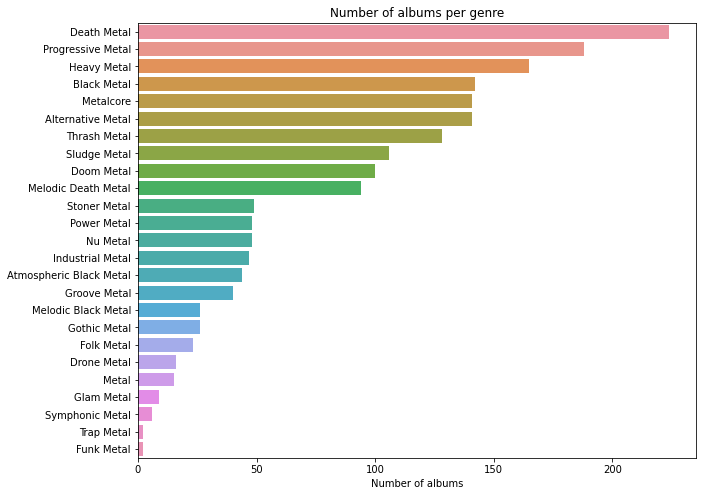

In [44]:
counts = metal_clean.Genre.value_counts().reset_index()
fig = plt.figure(figsize=(10,8))
sns.barplot(x='Genre', y='index', data=counts)
plt.title('Number of albums per genre')
plt.xlabel('Number of albums')
plt.ylabel('')

<p align="justify">
The plot shows the number of albums per genre in the data set. Looks like the subgenre with the most number of albums is Death Metal, followed by Progressive Metal and Heavy Metal. It's interesting that five of the most extreme metal subgenres (Death, Melodic Death, Black, Doom metal and Metalcore) are inside the top 10. It's not a surprise that subgenres like Heavy, Progressive and Thrash metal are in the top 10, they are probably the most popular metal subgenres. It surprises me that Power Metal is outside the top 10. It also surprises me a lot that Symphonic Metal has less than 20 albums in this dataset when this subgenre is one of the most popular and one the genres that produces many records each year. It's also interesting Glam Metal has less than 50 records in this data set when it was the most popular genre in the 80s.

## What are the most acclaimed albums of each of the year by the users?

In [45]:
years = [i for i in range(1970, 2021)]
for year in years:
    data_year = metal_clean[metal_clean['Release Year'] == year]
    score = data_year['User Score'].max()
    secondary_df = data_year[data_year['User Score'] == score]
    artist = secondary_df['Artist'].tolist()
    album = secondary_df['Title'].tolist()
    for i in range(0, len(artist)):
        print('{}: "{}" by {}'.format(year, album[i], artist[i].upper()))
        print('-'*20)

1970: "Paranoid" by BLACK SABBATH
--------------------
1971: "Master of Reality" by BLACK SABBATH
--------------------
1972: "Black Sabbath Vol. 4" by BLACK SABBATH
--------------------
1973: "Sabbath Bloody Sabbath" by BLACK SABBATH
--------------------
1975: "Sabotage" by BLACK SABBATH
--------------------
1976: "Sad Wings of Destiny" by JUDAS PRIEST
--------------------
1977: "Sin After Sin" by JUDAS PRIEST
--------------------
1978: "Stained Class" by JUDAS PRIEST
--------------------
1979: "Overkill" by MOTÃ¶RHEAD
--------------------
1980: "Ace of Spades" by MOTÃ¶RHEAD
--------------------
1981: "Welcome to Hell" by VENOM
--------------------
1982: "The Number of the Beast" by IRON MAIDEN
--------------------
1983: "Kill 'Em All" by METALLICA
--------------------
1983: "Piece of Mind" by IRON MAIDEN
--------------------
1984: "Ride the Lightning" by METALLICA
--------------------
1985: "To Mega Therion" by CELTIC FROST
--------------------
1985: "Seven Churches" by POSSESSED
----

<p align="Justify">
It's not surprise that Black Sabbath had the best metal album from 1970 to 1975 as it's considered as the first heavy metal band. What I, personally, find interesting is that five of the biggest metal bands from UK (Black Sabbath, Judas Priest, Mötorhead, Iron Maiden, Venom) dominated from 1970 to 1982, In 1983 Metallica appeared in the market with the album "Kill 'em All", actually their first four albums are in the list, "Ride The Lightning" (1984), "Master of Puppets" (1986) and "...And Justice for All" (1988). Also, the 80s had nine albums made by artists from the US. In 1982 there was a tie between Metallica's "Kill 'em All" and Iron Maiden's "Peace of Mind." The 80s were dominated by Heavy and Thrash Metal.

<p align="Justify">
The 90s were dominated by Death Metal, especially from the US, but there was bands from Sweden like Entombed, Dismember and In Flames. In the 90s another really popular genre (with too many controversies on their backs) was Black Metal, short story there was this group called Inner Circle where members from Mayhem, Burzum, Emperor, Darkthrone, Immortal and Enslaved, burned 52 churches across Norway between 1992 and 1998.

<p align="Justify">
It's awesome to see Rage Against The Machine with their homonymous album in 1992. This band is one of the best bands ever, they made a fusion between metal, funk and hip hop and their lyrics are against capitalism, globalization and war (Some radio stations banned them after 9/11 for being "anti-patriots.") It's also considered as the most famous protest band in the US.

<p align="Justify">
The 2000s started really great with Deftones and System of a Down taking the best album of 2000 and 2001. Behemoth's "Demigod" took the first spot at 2004. Opeth joined the list of artists that had more than one album in the list in 2005. The only Symphonic Metal group so far in the list was Kamelot with "The Black Halo" in 2005. Gojira appears twice in the first decade of the 2000s, first in 2005 with "From Mars to Sirius" and in 2008 with "The Way All Flesh. "Mastodon also had two records here one in 2006 and the other in 2009. The first decade of the 2000s was dominated by Death Metal and a little bit of Nu Metal.

<p align="Justify">
From 2010 to 2020, Death Metal groups took the first spots on multiple years. A good surprise is Dir En Grey's "Dum Spiro Spero." It's the first and only Japanese band on the list, and the band has influence from Death, Progressive, Avant-garde and Goth Metal.

</p>


Text(0.5, 0, 'Albums')

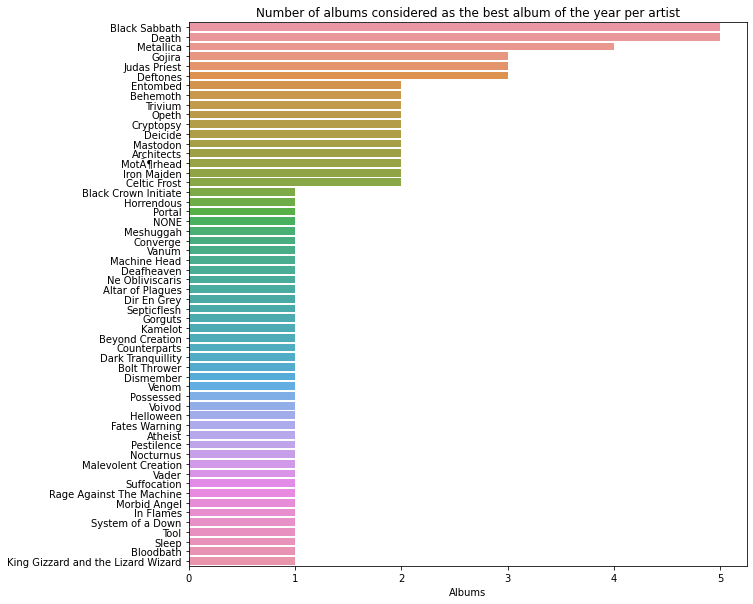

In [46]:
artist_dic = {}
years = [i for i in range(1970, 2021)]
for year in years:
    data_year = metal_clean[metal_clean['Release Year'] == year]
    score = data_year['User Score'].max()
    secondary_df = data_year[data_year['User Score'] == score]
    artist = secondary_df['Artist'].tolist()
    for i in artist:
      if i not in artist_dic:
        artist_dic[i] = 1
      else:
        artist_dic[i] += 1

artist_count = pd.DataFrame(data=artist_dic.values(), index=artist_dic.keys(), columns=['count'])
artist_count.sort_values(by=['count'], ascending=False, inplace=True)
fig = plt.figure(figsize=(10,10))
sns.barplot(x='count', y=artist_count.index, data=artist_count)
plt.title('Number of albums considered as the best album of the year per artist')
plt.xlabel('Albums')

<p align="Justify">
As the yearly output is really long it's a little bit difficult to count how many top albums each artist had. In this plot we see that most of the artists only had one album in the list. Only two artists had five albums in the list, Black Sabbath (Heavy Metal) and Death (Death Metal). Metallica is the only artist that has four albums in the list and those are their first four albums, "Kill 'em All", "Ride The Lightning", "Master of Puppets" and "...And Justice for All" it's interesting that their homonymous album "Metallica" (AKA "Black Album) didn't made it into the list as is considered for most fans and critics as Metallica's best album.
<p align="Justify">
Gojira, Judas Priest and Deftones had three albums on the list, and finally Entombed, Behemoth, Trivium, Opeth, Cryptopsy, Deicide, Mastodon, Architects, Motörhead, Iron Maiden and Celtic Frost have two albums on the list.

## Most hyped records by year according to users reviews

In [47]:
years = [i for i in range(1970, 2021)]
for year in years:
    data_year = metal_clean[metal_clean['Release Year'] == year]
    score = data_year['User Reviews'].max()
    secondary_df = data_year[data_year['User Reviews'] == score]
    artist = secondary_df['Artist'].tolist()
    album = secondary_df['Title'].tolist()
    for i in range(0, len(artist)):
        print('Most hyped record in {} was "{}" by {} with {} user reviews'.format(year, album[i], artist[i].upper(), score))
        print('-'*20)

Most hyped record in 1970 was "Paranoid" by BLACK SABBATH with 867.0 user reviews
--------------------
Most hyped record in 1971 was "Master of Reality" by BLACK SABBATH with 490.0 user reviews
--------------------
Most hyped record in 1972 was "Black Sabbath Vol. 4" by BLACK SABBATH with 295.0 user reviews
--------------------
Most hyped record in 1973 was "Sabbath Bloody Sabbath" by BLACK SABBATH with 267.0 user reviews
--------------------
Most hyped record in 1975 was "Sabotage" by BLACK SABBATH with 200.0 user reviews
--------------------
Most hyped record in 1976 was "Sad Wings of Destiny" by JUDAS PRIEST with 142.0 user reviews
--------------------
Most hyped record in 1977 was "Sin After Sin" by JUDAS PRIEST with 116.0 user reviews
--------------------
Most hyped record in 1978 was "Stained Class" by JUDAS PRIEST with 134.0 user reviews
--------------------
Most hyped record in 1979 was "Overkill" by MOTÃ¶RHEAD with 145.0 user reviews
--------------------
Most hyped record in 1

<p align="Justify">
The most hyped record on the list is "I Disagree" (2020) by Poppy, followed by "Fear Inoculum" (2019) by Tool, "Meteora" (2003) by Linkin Park, "Toxicity" (2001) by System of a Down and "Rage Against The Machine" (1992) by Rage Against The Machine.
<p align="Justify">
From 1970 to 1982 the most hyped albums were made by British Heavy Metal artists (Black Sabbath, Judas Priest, Motörhead, Iron Maiden), from 1983 to 1991 Thrash Metal (Metallica, Megadeth, Anthrax, Sepultura) artists had the most hyped records.
<p align="Justify">
From 1992 and so on there's a diversity of genres, Progressive Metal (Tool), Nu Metal (Korn, Slipknot, Deftones), Thrash Metal (Metallica), Death Metal (Behemoth). Some of the records in this list appear in the most acclaimed albums according to users. But as it happened in the other notebook the majority of them doesn't

## Artists that generate the most hype

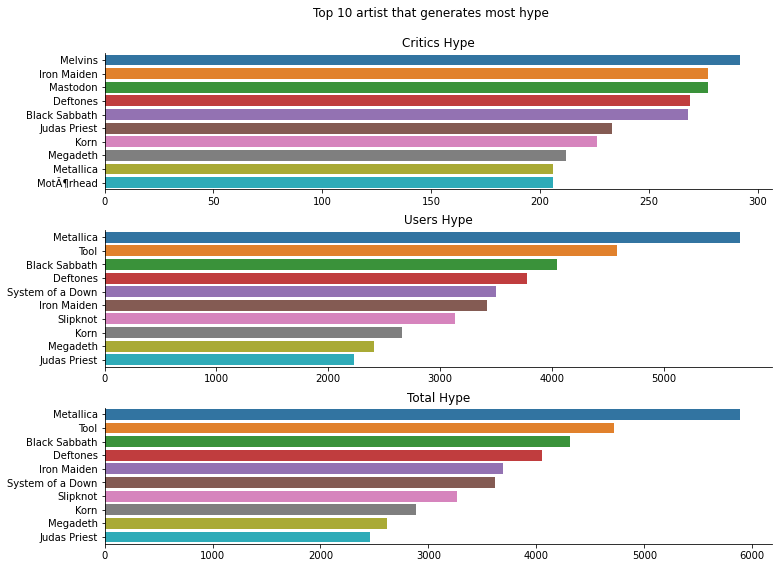

In [48]:
fig, ax = plt.subplots(3, 1, figsize=(10,8))
fig.tight_layout()
fig.subplots_adjust(top=0.9)

data_artist = metal_clean[['Artist', 'Critic Reviews', 'User Reviews']].copy()

critics = data_artist[['Artist', 'Critic Reviews']]
critics_group = critics.groupby('Artist').sum()
critics_group.sort_values(by=['Critic Reviews'], ascending=False, inplace=True)
sns.barplot(ax=ax[0], x='Critic Reviews', y=critics_group.index[0:10], data=critics_group[0:10])
ax[0].set_title('Critics Hype')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

users = data_artist[['Artist', 'User Reviews']]
users_group = users.groupby('Artist').sum()
users_group.sort_values(by=['User Reviews'], ascending=False, inplace=True)
sns.barplot(ax=ax[1], x='User Reviews', y=users_group.index[0:10], data=users_group[0:10])
ax[1].set_title('Users Hype')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

data_artist['total_hype'] = data_artist['Critic Reviews'] + data_artist['User Reviews']
data_artist = data_artist[['Artist', 'total_hype']]
data_artist_group = data_artist.groupby('Artist').sum()
data_artist_group.sort_values(by=['total_hype'], ascending=False, inplace=True)
sns.barplot(ax=ax[2], x='total_hype', y=data_artist_group.index[0:10], data=data_artist_group[0:10])
ax[2].set_title('Total Hype')
ax[2].set_xlabel('')
ax[2].set_ylabel('') 

plt.suptitle('Top 10 artist that generates most hype')
plt.subplots_adjust(hspace=0.3)
sns.despine(left=False, bottom=False)

<p align="Justify">
To Measure the hype I decided to make three plots, the first one measures the critics hype. In that plot I found that the Melvins is the artist that generate the most hype to critics. This band is considered as one of the precursors of both grunge and sludge metal. In the second place we found Iron Maiden, which is no surprise their records are always expected for both critics and users. I expected to find Tool on this list as it's one of the most popular groups to critics.
<p align="Justify">
For Users, Metallica, Tool and Black Sabbath leads the list. Slipknot and Korn are good surprises here, both are Nu Metal bands. Also Megadeth in the 9th spot which is kind of a surprise because it should be higher.
<p align="Justify">
In the total hype, we see that Metallica leads the list, followed by Tool and Black Sabbath just like the users hype plot. When we look at the number of reviews, we found that the majority of reviews are made by users. One possible conclusion here is that probably Metal in general isn't that popular between critics or these websites (Metacritic and AOTY) doesn't collect a huge amount of critics reviews.

## Most Acclaimed artists according to critics

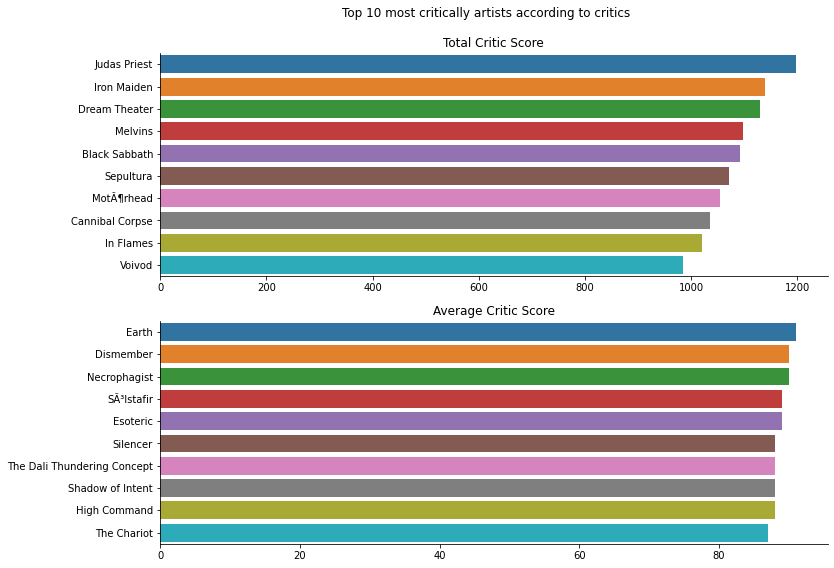

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))
fig.tight_layout()
fig.subplots_adjust(top=0.9)

data_artist = metal_clean[['Artist', 'Critic Score']]
data_artist_group = data_artist.groupby('Artist').sum()
data_artist_group.sort_values(by=['Critic Score'], ascending=False, inplace=True)
sns.barplot(ax=ax[0], x='Critic Score', y=data_artist_group.index[0:10], data=data_artist_group[0:10])
ax[0].set_title('Total Critic Score')
ax[0].set_xlabel('')
ax[0].set_ylabel('')


data_artist = metal_clean[['Artist', 'Critic Score']]
data_artist_group = data_artist.groupby('Artist').mean()
data_artist_group.sort_values(by=['Critic Score'], ascending=False, inplace=True)
sns.barplot(ax=ax[1], x='Critic Score', y=data_artist_group.index[0:10], data=data_artist_group[0:10])
ax[1].set_title('Average Critic Score')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.suptitle('Top 10 most critically artists according to critics')
plt.subplots_adjust(hspace=0.2)
sns.despine(left=False, bottom=False)

<p align="Justify">
To find this I decided to take two approaches. First by measuring the total critic score that each artist have had during its career, this will give an advantage to artists that have had a long career or artists that have released a fair number of records. Second by calculating the average critic score for each artist, this might benefit artists that have released one really good record.
<p align="Justify">
In the total critic score we found that Judas Priest (Heavy Metal) leads the list, they have 17 records on the list, all of them LPs. Their average critic score is 70.4. In second place we find Iron Maiden (Heavy Metal), they have 16 records, all of them LPs, on the list and an average score of 71.2. In third place we find Dream Theater (Progressive Metal) with 15 records (14 LPs, one EPs) and an average of 75.3. I'm surprised to see Cannibal Corpse in eighth place but they have 14 albums and an average score of 73.9. None of the artists in the top 10 had less than 15 albums.
<p align="Justify">
Using the average critic score we have a different top 10. This one is led by Earth but as I expected they only have one record on the list, with a critic score of 91. In second place we find Dismember with also one record on the list and a score of 90. Necrophagist in third place also has one record and a score of 90. All the members on the list have only one record. A constant is that most of the artists here are Death Metal, with some exceptions.



## Most acclaimed genres by critics

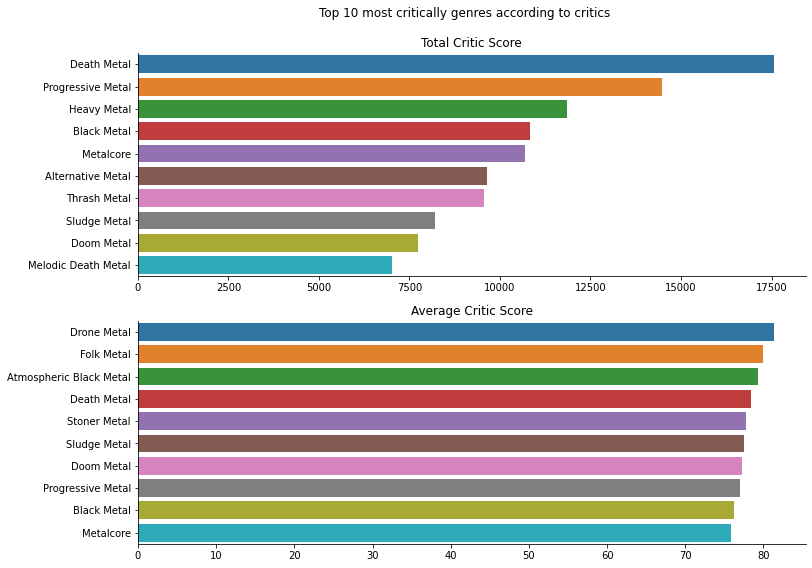

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))
fig.tight_layout()
fig.subplots_adjust(top=0.9)

data_genre = metal_clean[['Genre', 'Critic Score']]
data_genre_group = data_genre.groupby('Genre').sum()
data_genre_group.sort_values(by=['Critic Score'], ascending=False, inplace=True)
sns.barplot(ax=ax[0], x='Critic Score', y=data_genre_group.index[0:10], data=data_genre_group[0:10])
ax[0].set_title('Total Critic Score')
ax[0].set_xlabel('')
ax[0].set_ylabel('')


data_genre = metal_clean[['Genre', 'Critic Score']]
data_genre_group = data_genre.groupby('Genre').mean()
data_genre_group.sort_values(by=['Critic Score'], ascending=False, inplace=True)
sns.barplot(ax=ax[1], x='Critic Score', y=data_genre_group.index[0:10], data=data_genre_group[0:10])
ax[1].set_title('Average Critic Score')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.suptitle('Top 10 most critically genres according to critics')
plt.subplots_adjust(hspace=0.2)
sns.despine(left=False, bottom=False)

<p align="Justify">
To answer this i used the same approach that i made with the most acclaimed artists. Taking the total we found Death Metal as the most acclaimed genre with a total score close to 17500. This genre has 224 records on the list and an average critic score of 78.4. In second place we find Progressive Metal with a total score close to 14500. This genre has 188 records and an average critic score of 77. In third place we find Heavy Metal with a total score close to 11800, this genre has 165 records and an average critic score of 71.7.
<p align="Justify">
Using the average critic score we find Drone Metal in the first place, this genre is characterized by melding it's slow tempos and heaviness of doom metal with the long duration tunes of drone music (which is a minimalistic genre that emphasizes the use of sustained sounds, notes or tone clusters), this genre only has 16 records and an average score of 81. In second place we find Folk Metal with 23 records and an average score of 79, this genre is characterized by the use of folk instruments and the use of traditional singing style, like Dutch Heidevolk or Danish Sylvatica. Atmospheric Black Metal, which is a genre characterized by being less aggressive than black metal. It also incorporates atmospheric and dreamy textures into its sound. This genre has 44 records on the list and an average score of 79.
<p align="Justify">
I don't find huge surprises here, but it is interesting that critics have a tendency of liking groups and genres whos sound is slow paced or incorporates different sounds. In the Death Metal case, I wonder if they like groups that have gory lyrics or groups that have political, philosophical or mythological lyrics.

## Genres that generates the most feedback from critics and users

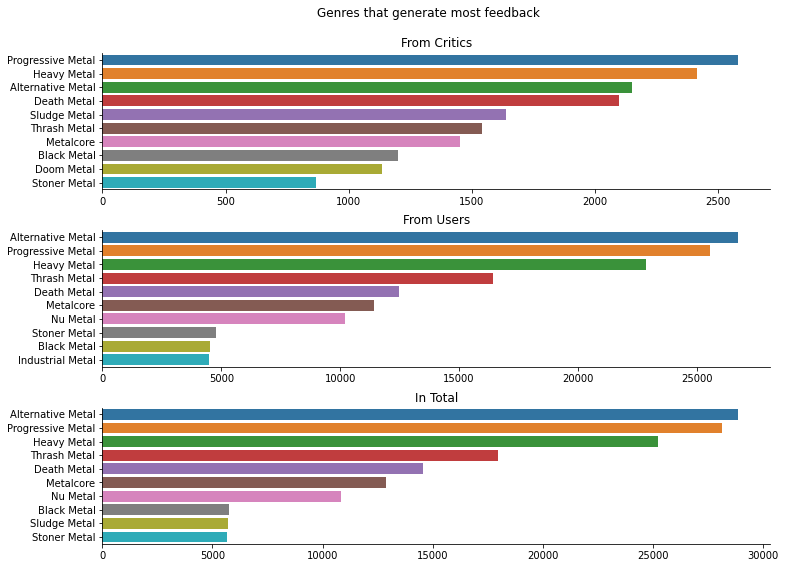

In [51]:
feedback = metal_clean[['Genre', 'Critic Reviews', 'User Reviews']].copy()
feedback = feedback[feedback['Genre'] != 'Unknown']
feedback['Total'] = feedback['Critic Reviews'] + feedback['User Reviews']

fig, ax = plt.subplots(3, 1, figsize=(10,8))
fig.tight_layout()
fig.subplots_adjust(top=0.9)

critics = feedback[['Genre', 'Critic Reviews']]
critics_group = critics.groupby('Genre').sum()
critics_group.sort_values(by=['Critic Reviews'], ascending=False, inplace=True)
sns.barplot(ax=ax[0], x='Critic Reviews', y=critics_group.index[0:10], data=critics_group[0:10])
ax[0].set_title('From Critics')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

users = feedback[['Genre', 'User Reviews']]
users_group = users.groupby('Genre').sum()
users_group.sort_values(by=['User Reviews'], ascending=False, inplace=True)
sns.barplot(ax=ax[1], x='User Reviews', y=users_group.index[0:10], data=users_group[0:10])
ax[1].set_title('From Users')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

total = feedback[['Genre', 'Total']]
total_group = total.groupby('Genre').sum()
total_group.sort_values(by=['Total'], ascending = False, inplace=True)
sns.barplot(ax=ax[2], x='Total', y=total_group.index[0:10], data=total_group[0:10])
ax[2].set_title('In Total')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

plt.suptitle('Genres that generate most feedback')
plt.subplots_adjust(hspace=0.3)
sns.despine(left=False, bottom=False)

<p align="Justify">
In the last section we found that there might be a possibility that critics love slow pace and clean sound metal. And in this one we keep seeing it. The first three spots on the critics plot are occupied by Progressive Metal, Heavy Metal and Alternative Metal. It also looks like critics doesn't talk a lot about heavier genres like Black Metal or Doom Metal. It's interesting, however, the fact that even if critics don't talk a lot about these genres, they give them high scores which also say that they recognize the quality of the genre.
<p align="Justify">
Users like to talk about alternative, progressive and heavy metal. They also don't talk a lot about heavier genres like Black Metal. In total the number of comments on both Metacritic and AOTY are about Alternative, Progressive and Heavy Metal, with more feedback from users than from critics.

## Albums with the most negative reception from critics

In [52]:
bad = metal_clean[['Artist', 'Title', 'Critic Score']].copy()
bad.sort_values(by=['Critic Score'], ascending= True, inplace=True)
bad[0:10]

,Artist,Title,Critic Score
2365,Limp Bizkit,Results May Vary,36.0
8487,Incubus,Fungus Amongus,42.0
5056,Megadeth,Super Collider,43.0
8790,Mudvayne,Lost and Found,46.0
16991,KISS,Animalize,46.0
9484,Godsmack,Faceless,47.0
24531,Lost Horizon,A Flame to the Ground Beneath,48.0
3621,Korn,Take a Look in the Mirror,48.0
16992,KISS,Asylum,48.0
22720,Snot,Get Some,48.0


<p align="Justify">
The album with the most negative reception by critics is, by no surprise, "Results May Vary" by Limp Bizkit. It looks like their result did not vary at all. On Metacritic they have six negative, four mixed and one positive review, meanwhile on AOTY they have two mixed and six negative reviews. Most of the critics agree that the album was a failure and that the music doesn't have any melody, hooks or energy. One of the critics at Dot Music said:

"*Eventually, 'Results May Vary' could become a fascinating document - a frightening insight into the vacuous state of 21st century culture.*"

Rob Fitzpatrick at NME says: "*‘Results May Vary’ isn’t worth your anger*"

<p align="Justify">
In second place we find "Fungus Amongus" by Incubus, there is only one critic review by Deal Carlson at AllMusic that says: 

"*Incubus' independent debut is an unremarkable take on suburban MTV funk*"

This was Incubus' first album and it looks like not many people like it, as it has a user score of 57 and their reviews aren't good.

<p align="Justify">
The only surprise on the list, which isn't actually a surprise as its their most disliked album on their entire career, we found Megadeth's, not Thrash Metal album, "Super Collider." And that was the opinion of the critics as well. This isn't a Thrash Metal album and that was totally unexpected. Greg Pratt at Exclaim says:
<p align="Justify">
<i>"While there's nothing abhorrent about this album, it's so unobtrusive that it's practically not there, just one more forgettable release from a guy we're all secretly rooting for."</i>

<p align="Justify">
Kiss is the only artist that has two entries in this top 10 with "Animalize" (1984) and "Asylum" (1985). Both records are heavily criticized because its sound is very similar to pop artist than to heavy metal. Most of the records on this list are not really bad, except "Results May Vary", they are pretty close to Metacritic's mixed and average reviews score.





## Albums with the most negative reception from users

In [53]:
bad = metal_clean[['Artist', 'Title', 'User Score']].copy()
bad.sort_values(by=['User Score'], ascending= True, inplace=True)
bad[0:10]

,Artist,Title,User Score
23155,Five Finger Death Punch,And Justice for None,32.0
2365,Limp Bizkit,Results May Vary,33.0
3751,Metallica,St. Anger,46.0
8020,Cynic,Kindly Bent to Free Us,46.0
1983,Limp Bizkit,Gold Cobra,48.0
5056,Megadeth,Super Collider,48.0
2291,Korn,The Path of Totality,48.0
21584,Ministry,AmeriKKKant,49.0
23779,Disturbed,Evolution,50.0
10138,Bullet For My Valentine,Temper Temper,51.0


<p align="Justify">
The most disliked album for fans is "And Justice for None" by Five Finger Death Punch, the main critic made is that the lyrics 
<p align="Justify">
<i>"in most of the album are laughable, and most of their songs sound the exact same aside from a few slight differences."</i> 

For critics this album has mixed reviews, Rolling Stone says: 

<i>"It's all piss and vinegar and posturing."</i>

<p align="Justify">
No surprise on second place, Limp Bizkit's "Results May Vary" definitely didn't vary at all and fans says: 
<p align="Justify">
<i>"Are they seriously thinking anyone will take this crap seriously?", "This is an album, if you can even call it that, that you hear and think to yourself “How could anybody approve of this?”. Fred Durst is easily one of the biggest jokes in rock history, and it primarily comes from this awful LP. Its biggest sin however is attempting to recreate a classic track from The Who which results in probably the worst cover song of all time."</i>

<p align="Justify">
Metallica's "St Anger" in third place, isn't a surprise either as it's Metallica's most disliked work by fans. Critics on the other side praised the album, Entertainment Weekly said:
<p align="Justify">
<i>"”St. Anger” is arguably the season’s finest metal offering – and the band’s best since 1991’s ”Metallica”."</i> 

However fans opinions are: 
<p align="Justify">
<i>"St. Anger is exactly what critics pan for it. There is poor editing and the album is a mess of wild confusion, distortion, off-beat drumming and fear. "Frantic" the initial track perfectly shares the emotional instability felt on this album. While musically fractured, it is one of the most fascinating albums put out by Metallica."</i> 
<p align="Justify">
<i>"This album is a mess, we have some bad mixing here, instruments out of tune and that snare drum sounding like a trashcan, they should've worked a bit more on these aspects, if you search for live performances where they have everything right, you can see that it could be a lot better, we have the guitars working well, the drums sounding like real drums, even some improvised guitar solos, St. Anger had a lot of potential, but the turbulent moment the band was going through kinda ruined it."</i>

<p align="Justify">
Only the first two places are considered as bad or in Metacritic's metascore with "generally unfavorable reviews." The rest have mixed reviews.

## Most Hyped EP according to Critics

In [54]:
ep = metal_clean[metal_clean['Format'] == 'EP'].copy()
ep = ep[['Artist', 'Title', 'Critic Reviews']]
ep.sort_values(by=['Critic Reviews'], ascending=False, inplace=True)
ep[0:10]

,Artist,Title,Critic Reviews
23303,Thou,Rhea Sylvia,15.0
10025,Inter Arma,The Cavern,15.0
6349,Metallica,Beyond Magnetic,14.0
3547,Down,Down IV Part I - The Purple EP,14.0
4668,The Body,"Master, We Perish",13.0
16205,Gorguts,Pleiades' Dust,13.0
3387,Tool,Opiate,12.0
8770,Periphery,Clear,12.0
23027,Thou,The House Primordial,12.0
24538,Jinjer,Micro,11.0


<p align="Justify">
The first thing we see here is that there aren't a lot of critics in Metal, if we compare with the global review there was at least 60 reviews on the most hyped EP.
<p align="Justify">
Thou's "Rhea Sylvia" and Inter Arma's "The Cavern" were the most hyped EPs on the list. They also have good critic and user scores. About "Rhea Sylvia" critics say:
<p align="Justify">
<i>"These ambitions, of which, are completely realized as Rhea Sylvia is a beautiful and haunting standout among an already incredible body of work."</i> 

About "The Cavern", which is a 45 minute track: 
<p align="Justify">
<i>"...The Cavern is a brilliantly sustained metallic workout that shifts from barrages of gut-punch riffage to breathless moments of creeping menace and back again"</i>
<p align="Justify">
Metallica's "Death Magnetic" which was their return to their thrash roots was really expected by both critics and fans, and was considered as:

<i>"their best work in 17 years"</i>
<p align="Justify">
The majority of records here are Sludge/Death Metal with the exception of Tool, Metallica and Periphery.

## Most Hyped EP according to Users

In [55]:
ep = metal_clean[metal_clean['Format'] == 'EP'].copy()
ep = ep[['Artist', 'Title', 'User Reviews']]
ep.sort_values(by=['User Reviews'], ascending=False, inplace=True)
ep[0:10]

,Artist,Title,User Reviews
3387,Tool,Opiate,212.0
3745,Nine Inch Nails,Broken,188.0
24538,Jinjer,Micro,108.0
13446,Dream Theater,A Change of Seasons,105.0
6349,Metallica,Beyond Magnetic,102.0
10025,Inter Arma,The Cavern,99.0
8770,Periphery,Clear,97.0
11737,Celtic Frost,Morbid Tales,92.0
7484,Slayer,Haunting the Chapel,89.0
23438,Converge,Beautiful Ruin,86.0


<p align="Justify">
As expected Tool leads the list with "Opiate", this EP has a critic score of 64 and a user score of 76. The best thing about this album is that is <i>"This was Tool before it became the Tool we know today."</i> In second place we find Nine Inch Nails' "Broken" with a critic score of 78 and a user score of 80. In third place we find Jinjer's "Micro" which is praised not only by its sound but also by Tatiana Shmaylyuk's vocal versatility.

The biggest difference between this list and the critics list is that this list is more diverse.



## Months well recieved by critics and users

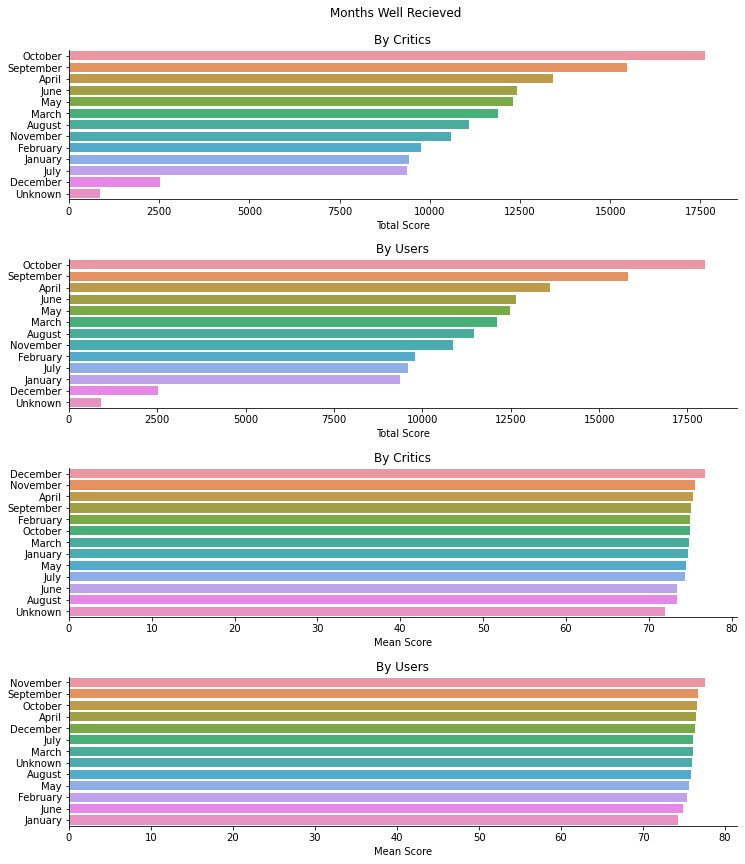

In [56]:
fig, ax = plt.subplots(4, 1, figsize=(10,12))
fig.tight_layout()
fig.subplots_adjust(top=0.93)

critics = metal_clean[['Release Month', 'Critic Score']].copy()
critics_group = critics.groupby('Release Month').sum()
critics_group.sort_values(by=['Critic Score'], ascending=False, inplace=True)
sns.barplot(ax=ax[0], x='Critic Score', y=critics_group.index, data=critics_group)
ax[0].set_title('By Critics')
ax[0].set_xlabel('Total Score')
ax[0].set_ylabel('')

users = metal_clean[['Release Month', 'User Score']].copy()
users_group = users.groupby('Release Month').sum()
users_group.sort_values(by=['User Score'], ascending=False, inplace=True)
sns.barplot(ax=ax[1], x='User Score', y=users_group.index, data=users_group)
ax[1].set_title('By Users')
ax[1].set_xlabel('Total Score')
ax[1].set_ylabel('')

critics = metal_clean[['Release Month', 'Critic Score']].copy()
critics_group = critics.groupby('Release Month').mean()
critics_group.sort_values(by=['Critic Score'], ascending=False, inplace=True)
sns.barplot(ax=ax[2], x='Critic Score', y=critics_group.index, data=critics_group)
ax[2].set_title('By Critics')
ax[2].set_xlabel('Mean Score')
ax[2].set_ylabel('')

users = metal_clean[['Release Month', 'User Score']].copy()
users_group = users.groupby('Release Month').mean()
users_group.sort_values(by=['User Score'], ascending=False, inplace=True)
sns.barplot(ax=ax[3], x='User Score', y=users_group.index, data=users_group)
ax[3].set_title('By Users')
ax[3].set_xlabel('Mean Score')
ax[3].set_ylabel('')

plt.suptitle('Months Well Recieved')
plt.subplots_adjust(hspace=0.4)
sns.despine(left=False, bottom=False)

<p align="Justify">
Using the total score, we find that most metal albums are released in October, September, April and June. On the other side, it looks like December isn't a month with a lot of metal releases. This happens for both critics and users.
<p align="Justify">
With the mean score we can find how the success of records released on each month. If we compare the months that accumulated more score we find that October has a mean score close to 74 for critics and 75 for users, September and April are close to 75 for both critics and users, and June is the least successful month with a mean score close to 71 for critics and 73 for users.
<p align="Justify">
We also see that users are less critic and tend to give better scores than critics but it looks like there's no huge differences.

## Number of records released by month

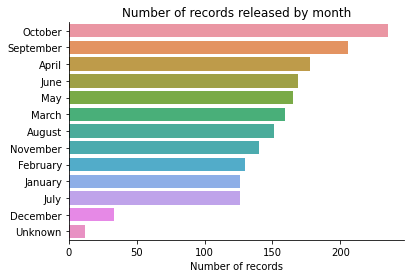

In [57]:
months = metal_clean['Release Month'].value_counts().reset_index()
sns.barplot(x='Release Month', y='index', data=months)
plt.title('Number of records released by month')
plt.ylabel('')
plt.xlabel('Number of records')
sns.despine(left=False, bottom=False)

<p align="Justify">
October is the month with most albums released with over 200 albums in total, September and April are close. In terms of competitiveness, it looks like it's better to release an album in December, January and July.
<p align="Justify">
This plot is similar as the total score according to critics and users. However, if we use the mean score plot and this plot to try to find a good month to release an album, it looks like November it's a great month, it's close to 150 records released but it has a mean score of 75 in both critics and users.

## Months most well recieved by critics and number of records released per month according to genres

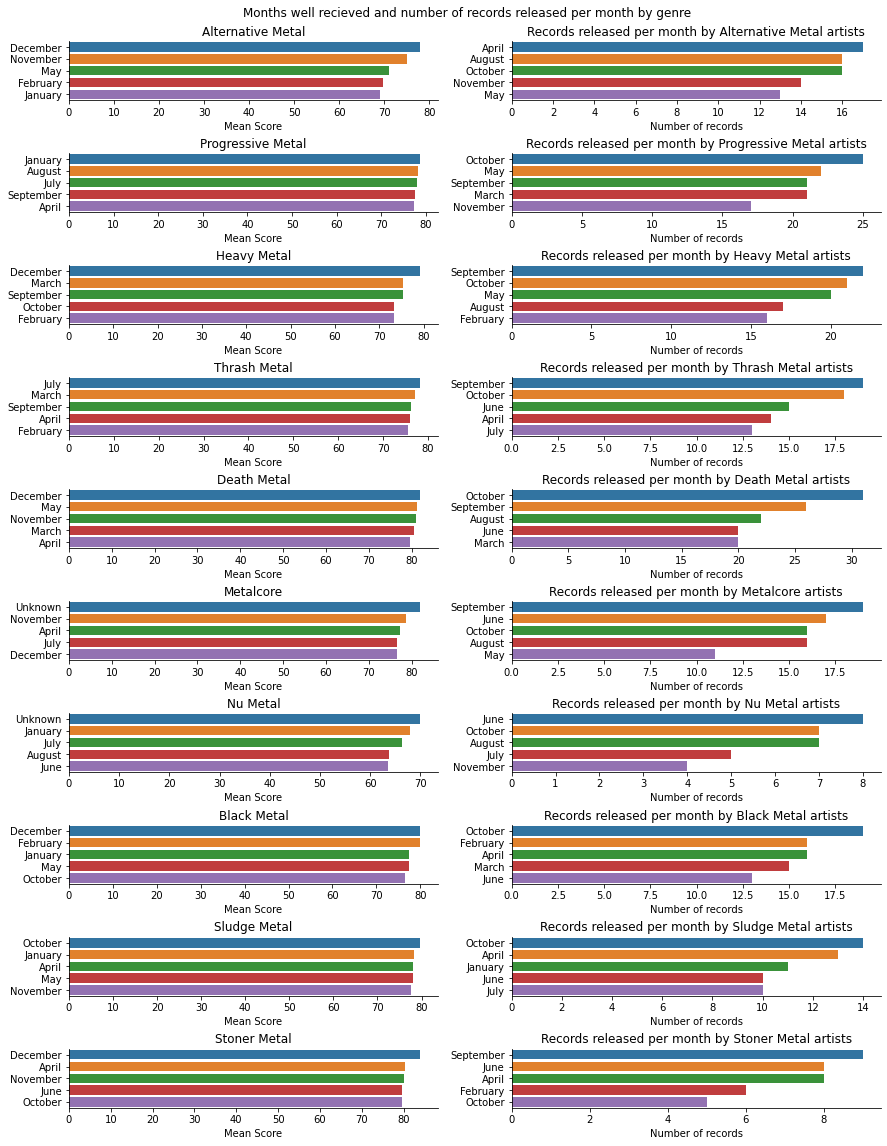

In [58]:
fig, ax = plt.subplots(10, 2, figsize=(12,16))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
ax = ax.flatten()
genres = ['Alternative Metal', 'Progressive Metal', 'Heavy Metal', 'Thrash Metal', 'Death Metal', 'Metalcore', 
          'Nu Metal', 'Black Metal', 'Sludge Metal', 'Stoner Metal']
i = 0
for genre in genres:
  genre_data = metal_clean[metal_clean['Genre'] == genre].copy()
  critics = genre_data[['Release Month', 'Critic Score']].copy()
  critics_genre = critics.groupby('Release Month').mean()
  critics_genre.sort_values(by=['Critic Score'], ascending=False, inplace=True)
  sns.barplot(ax=ax[i], x='Critic Score', y=critics_genre.index[0:5], data=critics_genre[0:5])
  ax[i].set_title(genre)
  ax[i].set_xlabel('Mean Score')
  i += 1

  months = genre_data['Release Month'].value_counts().reset_index()
  sns.barplot(ax=ax[i], x='Release Month', y='index', data=months[0:5])
  title = 'Records released per month by ' + genre + ' artists'
  ax[i].set_title(title)
  ax[i].set_xlabel('Number of records')
  i += 1

plt.suptitle('Months well recieved and number of records released per month by genre')
plt.subplots_adjust(hspace=0.9, wspace=0.2)
sns.despine(left=False, bottom=False)

for ax in ax.flat:
  ax.set(ylabel='')

<p align="Justify">
In this plot I took the ten genres that generates more feedback and plotted them alongside the number of records released per month by artists of that genre.
<p align="Justify">
It's interesting that only Sludge Metal have really good scores on the month were artists release most records. In October there are 14 records released and they have a mean score of 80. In January there are 11 records released but they have a mean score close to 89 and in April there are 13 records released with a mean score close to 88. As there isn't a huge difference between them, it looks like any of these months are good months to release Sludge Metal records.
<p align="Justify">
Alternative Metal artists might have good scores in December, also that month is a month with a low number of releases so it could sell well. There are 14 releases in November and they have a mean score of 85. January looks like another month with a low number of releases but critics score in this month is close to 70, maybe the records released in January weren't that good or critics are more strict this month.
<p align="Justify">
Progressive Metal looks interesting as none of the months with most albums released are in the months with the greatest scores. It looks like a saturated Progressive Metal market isn't good for artists and they should release records on any other month. It also looks like this genre is constant with their quality as the variance between the scores are really low.
<p align="Justify">
December looks like a great month for Heavy Metal as they have a score close to 80 and low amount of releases. September is the month with most releases and they have scores close to 85. February has a score close to 72 and 16 releases so it's an interesting month to release a new album.
<p align="Justify">
Thrash Metal's best month is July with a score close to 80 and 13 releases. September is the month with the most releases with over 20 releases and a score of 85. It looks like even if the market is saturated with Thrash Metal records, these aren't bad at all.
<p align="Justify">
October is the month with more Death Metal releases which isn't a surprise as most Death Metal groups have scary lyrics and concepts, like Lamb of God for example. However, this month isn't its best month in terms of scores. It's interesting that December is the month with the best score. It also looks like there is no big difference in the scores in December, May, November and March. A similar situation happens with Black Metal; the most releases happens in October but its best score (80) happens in December and February. October, however, is a good month with a score of 75.
<p align="Justify">
Metalcore's best month is unknown as most of the information about releases were missing. But it looks like most of the records are released in September. The mean score of this genre is close to 75 which is no surprise. A similar thing happens with Nu Metal; we don't know which month has the best scores, but January is good with a score close to 70, and it's a month with not many releases.
<p align="Justify">
It looks like October is the best month to release sludge metal records as this month has a score of 80 even with most of 14 records released. January and April are another two good months even with a kind of saturated market.
<p align="Justify">
Finally, Stoner Metal have its best month in December with scores over 80. It also looks like this month has a low amount of release. It's also possible to say that there are not so many releases of this genre as September, the month with the most number of releases only have 9 releases.

## Records not well recieved by users but are the most acclaimed by the critic

In [59]:
records = metal_clean[['Artist', 'Title', 'Critic Score', 'User Score']].copy()
records.sort_values(by=['Critic Score'], inplace=True, ascending=False)
records = records[(records['Critic Score'] >= 80) & (records['User Score'] <= 39)]
records

,Artist,Title,Critic Score,User Score


In [60]:
records = metal_clean[['Artist', 'Title', 'Critic Score', 'User Score']].copy()
records.sort_values(by=['Critic Score'], inplace=True, ascending=False)
records = records[(records['Critic Score'] >= 80) & (records['User Score'] <= 55)]
records

,Artist,Title,Critic Score,User Score
8266,Triptykon,Melana Chasmata,82.0,54.0


In [61]:
records = metal_clean[['Artist', 'Title', 'Critic Score', 'User Score']].copy()
records.sort_values(by=['Critic Score'], inplace=True, ascending=False)
records = records[(records['Critic Score'] >= 70) & (records['User Score'] <= 55)]
records

,Artist,Title,Critic Score,User Score
8266,Triptykon,Melana Chasmata,82.0,54.0
19829,Motionless in White,Graveyard Shift,77.0,52.0
29124,Six Feet Under,Nightmares of the Decomposed,72.0,51.0


Using Metacritic's values for Universal acclaim (scores over 80) and Generally unfavorable reviews (scores under 39) I tried to find the records that are acclaimed by the critics and hated by fans. However using those values, I did not found any record, i had to increase the User Score up to 55 to find that Triptykon's "Melana Chasmata" fills the criteria. This record was released in 2014, and it's very praised by critics, for example Kerrang Magazine, who gave this record a score of 100, says <i>"It's all deathly bleak, fantastically original, and the heaviest album of 2014"</i>, while SputnikMusic said <i>"It's undoubtedly his most impressive collection of songs in over two decades"</i> There are some harsher critics like The Austin Chronicle, who gave it a score of 67 and said <i>"this record isn't as compelling as Frosties past, it at least signals a veteran innovator still engaged in his craft."</i>

However, fans said <i>"Definitely, not their best, they have other albums way better than this and to me it shows"</i>, <i>"just listened to it. And its not really bad. But lets be honest I expected something more by the reviews."</i> Also some of the bad critics made by users are from people who don't like this type of music.

If I decrease the Critics Score to 70, two more records are found "Graveyard Shift" by Motionless in White and "Nightmares of the Decomposed" by Six Feet Under, but as "Melana Chasmata" both records aren't as bad as "Result May Vary" by Limp Bizkit.


## Records not well recieved by the critics but acclaimed by the fans

In [62]:
bad = metal_clean[['Artist', 'Title', 'User Score', 'Critic Score']].copy()
bad.sort_values(by=['User Score'], inplace=True, ascending=False)
bad = bad[(bad['User Score'] >= 80) & (bad['Critic Score'] <= 39)]
bad

,Artist,Title,User Score,Critic Score


In [63]:
bad = metal_clean[['Artist', 'Title', 'User Score', 'Critic Score']].copy()
bad.sort_values(by=['User Score'], inplace=True, ascending=False)
bad = bad[(bad['User Score'] >= 75) & (bad['Critic Score'] <= 55)]
bad

,Artist,Title,User Score,Critic Score
24531,Lost Horizon,A Flame to the Ground Beneath,82.0,48.0
7656,Helmet,Aftertaste,75.0,54.0


Using the same scores for acclaimed albums by fans and not well received by critics I did not found anything, I had to decrease both scores to 75 and 55 to find two records.

"A Flame to the Ground Beneath" by Lost Horizon only has one Critic review and basically complains on how cliché and stereotypical the group is. On the users side, there are only two reviews one that just says <i>"WHOA-OH-OH-AH-AH-AH-AAAA-HA-AH-AH-AH"</i> five times and the second says <i>"An underappreciated Power Metal band with their second and last release with incorporates of progressive and symphonic metal to great an epic fantasy like soundscape which is both captivating and thrilling. With something powerful soaring vocals with screams in triumphant, it is easy to see why many Power Metal Fans say this is one of the bests the genre has ever put out."</i>

A similar situation happens with Helmet's "Aftertaste"; Stephen Thomas Erlewine at AllMusic says <i>"Without the invention of Betty or the gut-level force of Meantime, Helmet is simply a bland alternative metal band, lacking riffs, hooks and purpose and relying only on volume. It's a shocking and disheartening turn of events for one of the more intriguing metal bands of the '90s."</i>, meanwhile Kevin Templeton at Drop-D said <i>"Although I consider myself a fan of Helmet's riffs... er, music, I can't help feeling that they could sound a little more dangerous than this."</i> This record doesn't have written user reviews but comments found on other websites says <i>"This album is a Classic that has stood the test of time. Some of my favourite lyrics and songs here"</i>

## Artist with greatest score by genre

Now let's find the artist that had the greates score in each genre combining both critics and user scores

In [64]:
genres = metal_clean['Genre'].unique()
genres.sort(axis=-1)
print('The artists with greatest score in:')
for genre in genres:
  data = metal_clean[metal_clean['Genre'] == genre].copy()
  data['Total Score'] = (data['Critic Score'] + data['User Score']) / 2
  data = data[['Artist', 'Total Score']]
  data_group = data.groupby('Artist').mean().reset_index()
  max_score = data_group['Total Score'].max()
  best = data_group[data_group['Total Score'] == max_score]
  artist = best['Artist'].tolist()
  for i in range(0, len(artist)):
    print('{}: {}'.format(genre, artist[i].upper()))

The artists with greatest score in:
Alternative Metal: SYSTEM OF A DOWN
Atmospheric Black Metal: NEGURÄƑ BUNGET
Atmospheric Black Metal: ULVER
Atmospheric Black Metal: YELLOW EYES
Black Metal: SILENCER
Death Metal: DISMEMBER
Doom Metal: ESOTERIC
Drone Metal: EARTH
Folk Metal: AGALLOCH
Funk Metal: SNOT
Glam Metal: QUIET RIOT
Gothic Metal: TIAMAT
Groove Metal: DECAPITATED
Heavy Metal: DAWNBRINGER
Industrial Metal: GODFLESH
Melodic Black Metal: VINTERLAND
Melodic Death Metal: SHADOW OF INTENT
Metal: AMENRA
Metal: SARGEIST
Metalcore: THE CHARIOT
Nu Metal: SLIPKNOT
Power Metal: GAMMA RAY
Progressive Metal: ALKALOID
Sludge Metal: CORROSION OF CONFORMITY
Sludge Metal: SÃ³LSTAFIR
Stoner Metal: ELECTRIC WIZARD
Symphonic Metal: EPICA
Thrash Metal: CELTIC FROST
Trap Metal: ZILLAKAMI & SOSMULA


## Best Album by Genre
Finally let's find the best album in each genre using both critic and user score

In [65]:
genres = metal_clean['Genre'].unique()
genres.sort(axis=-1)
print('Best album by genre')
for genre in genres:
  data = metal_clean[metal_clean['Genre'] == genre].copy()
  data['Total Score'] = (data['Critic Score'] + data['User Score']) / 2
  max_score = data['Total Score'].max()
  best = data[data['Total Score'] == max_score]
  artist = best['Artist'].tolist()
  album = best['Title'].tolist()
  for i in range(0, len(artist)):
    print('{}: {} by {}'.format(genre, album[i].upper(), artist[i].upper()))

Best album by genre
Alternative Metal: RAGE AGAINST THE MACHINE by RAGE AGAINST THE MACHINE
Atmospheric Black Metal: OM by NEGURÄƑ BUNGET
Atmospheric Black Metal: HVIS LYSET TAR OSS by BURZUM
Atmospheric Black Metal: BERGTATT Â€“ ET EEVENTYR I 5 CAPITLER by ULVER
Atmospheric Black Metal: IMMERSION TRENCH REVERIE by YELLOW EYES
Black Metal: IN THE NIGHTSIDE ECLIPSE by EMPEROR
Death Metal: LIKE AN EVER FLOWING STREAM by DISMEMBER
Doom Metal: A PYRRHIC EXISTENCE by ESOTERIC
Drone Metal: EARTH 2: SPECIAL LOW FREQUENCY VERSION by EARTH
Folk Metal: MABOOL: THE STORY OF THE THREE SONS OF SEVEN by ORPHANED LAND
Funk Metal: GET SOME by SNOT
Glam Metal: METAL HEALTH by QUIET RIOT
Gothic Metal: OBSIDIAN by PARADISE LOST
Groove Metal: BURN MY EYES by MACHINE HEAD
Heavy Metal: PARANOID by BLACK SABBATH
Industrial Metal: STREETCLEANER by GODFLESH
Melodic Black Metal: WELCOME MY LAST CHAPTER by VINTERLAND
Melodic Death Metal: THE GALLERY by DARK TRANQUILLITY
Melodic Death Metal: MELANCHOLY by SHADOW 